<a href="https://colab.research.google.com/github/Aidakazemi/BUS650/blob/main/BUSI650_Week8_ML_Lesson_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSI650 – Week 8 Lesson Plan
## Introduction to Machine Learning for Business


**Today we will:**
- Connect what we learned in previous weeks to *machine learning (ML)*
- Understand what **AI** and **ML** are (in business-friendly language)
- Learn the idea of **supervised learning** and **classification**
- Work with a small **customer churn** dataset
- Build two very simple ML models:
  - **Logistic Regression** (baseline model)
  - **Decision Tree (like Randome Forest)** (more flexible model)
- Practice **interpreting results for business decisions**, not just coding


## 1. Connecting Week 8 to Previous Weeks

So far in the course, we have learned how to:

- Use **descriptive analysis**: mean, median, standard deviation, distributions
- Do **hypothesis testing**: testing ideas about populations using samples
- Run **regression**: predicting a numeric outcome based on other variables
- Explore **time series**: data that changes over time (trend, seasonality)

You can think of **machine learning** as the next step:

> We use everything we’ve learned (data types, descriptive stats, regression, hypothesis testing) but now in a more automated way to **learn patterns** from data and **make predictions**.

In Week 8, we will **not** go deep into theory. Our goal is:

- Understand the **big picture** of ML
- See how ML can support **business decisions**
- Get comfortable reading and running simple ML code in **Colab**

## 2. What Are AI and Machine Learning?

### 2.1 Artificial Intelligence (AI)
- **AI** is a broad term.
- It means **machines doing tasks that usually require human intelligence**.
- Examples:
  - Chatbots answering questions
  - Recommendation systems ("People who bought X also bought Y")
  - Image recognition (detecting faces)

### 2.2 Machine Learning (ML)
- **ML** is a subset of AI.
- Instead of writing fixed rules, we **let the computer learn patterns from data**.
- In simple terms:
  > Machine learning = using data + algorithms to learn patterns and make predictions.

### 2.3 Key Types of ML (high level)
1. **Supervised Learning**
   - We have **input features** (X) and a **known target** (y).
   - Example: predict whether a customer will **churn (yes/no)** based on their usage.
   - Includes:
     - **Classification like Logit Regression** – target is a category (e.g., churn vs no churn)
     - **Regression** – target is numeric (e.g., sales amount next month)

2. **Unsupervised Learning**
   - We only have **features**, no target label.
   - Goal is to **discover structure** in the data.
   - Example: customer **segmentation** (clusters of similar customers).

In this notebook, we focus on **supervised learning – classification**.

## 3. Business Case: Customer Churn in a Subscription Company

Imagine you are a **Business Analytics Manager** at a subscription-based AI software company.

- Customers pay a **monthly fee**.
- They use your AI tools for **hours per month**.
- They sometimes contact **support** (complaints).
- They rate their **satisfaction** (1–5 scale).
- After some time, some customers **churn** (cancel) and some **stay**.

Our **business question**:

> Can we use machine learning to predict which customers are likely to churn, so that we can take action earlier?

To explore this, we’ll work with a small **synthetic dataset** that imitates this situation.

In [ ]:
# 1. Imports and Dataset Creation
# If you've already created df above in your notebook, you can skip this cell.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

np.random.seed(42)

print("Libraries imported successfully.")




Libraries imported successfully.


,Age,Monthly_Fee,Usage_Hours,Customer_Satisfaction,Number_of_Complaints,Tenure_Months,Region,Churn
0,58,104,21,1,0,39,West,0
1,48,58,47,1,0,38,North,0
2,34,119,63,4,1,21,South,0
3,62,52,55,4,1,20,East,0
4,27,120,58,4,1,3,East,1


In [ ]:
# ---- Create a synthetic customer churn dataset ----
n_customers = 500  # number of rows

age = np.random.randint(20, 70, size=n_customers)              # age between 20 and 69
monthly_fee = np.random.randint(20, 150, size=n_customers)     # subscription price
usage_hours = np.random.randint(5, 80, size=n_customers)       # hours used per month
customer_satisfaction = np.random.randint(1, 6, size=n_customers)  # 1 (low) to 5 (high)
number_of_complaints = np.clip(
    np.random.poisson(lam=1.5, size=n_customers),
    0, 10
)
tenure_months = np.random.randint(1, 61, size=n_customers)     # months with the company
region = np.random.choice(['North', 'South', 'East', 'West'], size=n_customers)

# Create a churn_score that roughly depends on these features
churn_score = (
    -0.04 * age +                    # slightly lower churn for older customers
     0.03 * monthly_fee +            # higher fee -> slightly more churn
    -0.08 * usage_hours +            # more usage -> less churn
    -0.8  * customer_satisfaction +  # happier -> less churn
     0.5  * number_of_complaints +   # more complaints -> more churn
    -0.05 * tenure_months +          # longer tenure -> less churn
    np.random.normal(0, 2, size=n_customers)  # random noise
)

# Convert churn_score into a probability using logistic function
churn_prob = 1 / (1 + np.exp(-churn_score / 10))

# Decide churn: 1 = churned, 0 = stayed
churn = (churn_prob > np.random.rand(n_customers)).astype(int)

# Put everything in a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Monthly_Fee': monthly_fee,
    'Usage_Hours': usage_hours,
    'Customer_Satisfaction': customer_satisfaction,
    'Number_of_Complaints': number_of_complaints,
    'Tenure_Months': tenure_months,
    'Region': region,
    'Churn': churn
})

df.head()

,Age,Monthly_Fee,Usage_Hours,Customer_Satisfaction,Number_of_Complaints,Tenure_Months,Region,Churn
0,50,145,23,2,2,40,West,0
1,61,116,21,5,1,15,South,0
2,29,93,73,5,2,5,West,0
3,49,134,43,4,1,4,North,0
4,37,70,75,2,1,58,North,1


In [ ]:
# 6. Quick Look at the Data Structure

print("Shape (rows, columns):", df.shape)
print("\nColumn info:")
print(df.info())

print("\nFirst 5 rows:")
df.head()

Shape (rows, columns): (500, 8)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    500 non-null    int64 
 1   Monthly_Fee            500 non-null    int64 
 2   Usage_Hours            500 non-null    int64 
 3   Customer_Satisfaction  500 non-null    int64 
 4   Number_of_Complaints   500 non-null    int64 
 5   Tenure_Months          500 non-null    int64 
 6   Region                 500 non-null    object
 7   Churn                  500 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 31.4+ KB
None

First 5 rows:


,Age,Monthly_Fee,Usage_Hours,Customer_Satisfaction,Number_of_Complaints,Tenure_Months,Region,Churn
0,50,145,23,2,2,40,West,0
1,61,116,21,5,1,15,South,0
2,29,93,73,5,2,5,West,0
3,49,134,43,4,1,4,North,0
4,37,70,75,2,1,58,North,1


## 2. Prepare Data for Machine Learning

We need to:
1. Separate **features** (inputs) from the **target** (what we predict).
2. Convert the categorical variable `Region` into numeric form.
3. Split data into **train** and **test** sets.

- **Train set**: what the model learns from.  
- **Test set**: unseen data to check how well the model generalizes.


In [ ]:
# 2.1 Separate X (features) and y (target)

y = df['Churn']           # 1 = churned, 0 = stayed
X = df.drop(columns=['Churn'])

print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()


Features shape: (500, 7)
Target shape: (500,)


,Age,Monthly_Fee,Usage_Hours,Customer_Satisfaction,Number_of_Complaints,Tenure_Months,Region
0,50,145,23,2,2,40,West
1,61,116,21,5,1,15,South
2,29,93,73,5,2,5,West
3,49,134,43,4,1,4,North
4,37,70,75,2,1,58,North


In [ ]:
# 2.2 One-Hot Encode the Region column (convert text -> numbers)

X_encoded = pd.get_dummies(X, columns=['Region'], drop_first=True)
X_encoded.head()


,Age,Monthly_Fee,Usage_Hours,Customer_Satisfaction,Number_of_Complaints,Tenure_Months,Region_North,Region_South,Region_West
0,50,145,23,2,2,40,False,False,True
1,61,116,21,5,1,15,False,True,False
2,29,93,73,5,2,5,False,False,True
3,49,134,43,4,1,4,True,False,False
4,37,70,75,2,1,58,True,False,False


In [ ]:
# 7. Descriptive Statistics (Numerical Columns)

df.describe()

,Age,Monthly_Fee,Usage_Hours,Customer_Satisfaction,Number_of_Complaints,Tenure_Months,Churn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,43.542000,85.088000,42.810000,2.946000,1.514000,29.246000,0.356000
std,14.198713,37.688421,22.087227,1.396777,1.216867,17.234836,0.479295
min,20.000000,20.000000,5.000000,1.000000,0.000000,1.000000,0.000000
25%,32.750000,53.000000,24.000000,2.000000,1.000000,15.000000,0.000000
50%,43.000000,87.000000,43.000000,3.000000,1.000000,29.000000,0.000000
75%,55.000000,117.000000,62.000000,4.000000,2.000000,44.000000,1.000000
max,69.000000,149.000000,79.000000,5.000000,6.000000,60.000000,1.000000


Churn
0    322
1    178
Name: count, dtype: int64


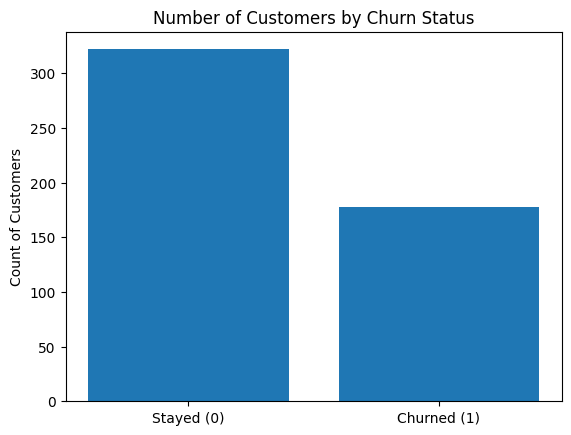

In [ ]:
# 8. How Many Customers Churned?

churn_counts = df['Churn'].value_counts().sort_index()
print(churn_counts)

plt.bar(['Stayed (0)', 'Churned (1)'], churn_counts)
plt.title('Number of Customers by Churn Status')
plt.ylabel('Count of Customers')
plt.show()

/tmp/ipython-input-515555279.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['Stayed (0)', 'Churned (1)'])


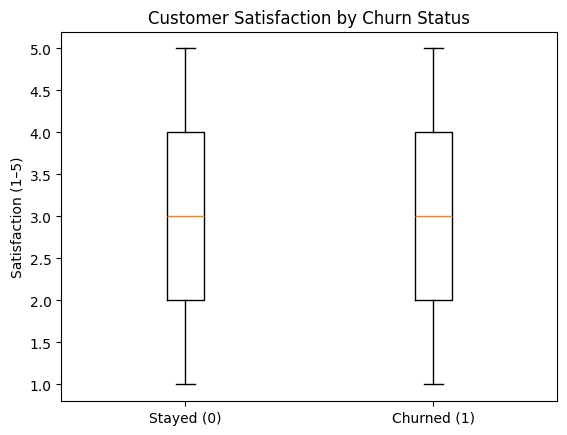

In [ ]:
# 9. Customer Satisfaction by Churn Status

data0 = df[df['Churn'] == 0]['Customer_Satisfaction']
data1 = df[df['Churn'] == 1]['Customer_Satisfaction']

plt.boxplot([data0, data1], labels=['Stayed (0)', 'Churned (1)'])
plt.title('Customer Satisfaction by Churn Status')
plt.ylabel('Satisfaction (1–5)')
plt.show()

## 4. Supervised Learning and Classification

Now we will use this dataset to **predict Churn (0 or 1)**.

- Our **features (inputs)** will be:
  - Age
  - Monthly_Fee
  - Usage_Hours
  - Customer_Satisfaction
  - Number_of_Complaints
  - Tenure_Months

- Our **target (output)** is:
  - `Churn` (1 = churned, 0 = stayed)

This is a **classification problem**, because the target is a **category** (churn / no churn), not a continuous number.

In [ ]:
# 2.3 Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.25,      # 25% for testing
    random_state=42,
    stratify=y           # keep same churn proportion in each split
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (375, 9) Test shape: (125, 9)


## 5. Logistic Regression – Our First ML Model

**Logistic regression** is a simple and popular algorithm for **binary classification**.

It learns how each feature is related to the **log-odds of Churn**, and outputs a
probability between 0 and 1.

**Business interpretation idea:**
- Positive coefficient → feature increases the chance of churn
- Negative coefficient → feature decreases the chance of churn

In [ ]:
# 3.1 Create and Train the Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [ ]:
# 3.2 Make Predictions on Test Data

# Predicted class labels (0 or 1)
y_pred = log_reg.predict(X_test)

# Predicted probabilities of churn (between 0 and 1)
y_proba = log_reg.predict_proba(X_test)[:, 1]

y_pred[:10], y_proba[:10]


(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0.5154142 , 0.27148798, 0.37552549, 0.42124423, 0.39524372,
        0.39563735, 0.36702379, 0.43761962, 0.19683016, 0.3822212 ]))

## 4. Evaluate Model Performance

For **classification** we mainly use:

- **Accuracy** – overall percent correct  
- **Confusion Matrix** – how predictions break down into TP, FP, TN, FN  
- **Precision / Recall / F1** – how well we identify the positive class (churners)


In [ ]:
# 4.1 Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.656


In [ ]:
# 4.2 Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual_NoChurn (0)', 'Actual_Churn (1)'],
    columns=['Pred_NoChurn (0)', 'Pred_Churn (1)']
)
cm_df


,Pred_NoChurn (0),Pred_Churn (1)
Actual_NoChurn (0),77,4
Actual_Churn (1),39,5


**How to read this confusion matrix**

- **Top-left (TN)**: correctly predicted not churn.  
- **Top-right (FP)**: predicted churn but customer actually stayed.  
- **Bottom-left (FN)**: predicted stay but customer actually churned.  
- **Bottom-right (TP)**: correctly predicted churn.

For churn, recall for class 1 (churn) is often very important:
missing a churner (False Negative) can be costly.


In [ ]:
# 4.3 Precision, Recall, F1

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.664     0.951     0.782        81
           1      0.556     0.114     0.189        44

    accuracy                          0.656       125
   macro avg      0.610     0.532     0.485       125
weighted avg      0.626     0.656     0.573       125





precision: when the model says “churn”, how often is it correct?

recall: of all true churners, how many did the model catch?

f1-score: a balance between precision and recall.



## 5. Understanding Logistic Regression Coefficients

Logistic regression models the **log-odds of churn** as a linear combination of features:

$$
\text{log-odds(churn)} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots
$$

- **Sign of coefficient (betas)**  
  - Positive → as the feature increases, churn probability tends to **increase**.  
  - Negative → as the feature increases, churn probability tends to **decrease**.

- **Magnitude of coefficient**  
  - Larger absolute value → stronger effect on churn.



In [ ]:
# 5.1 View Coefficients and Odds Ratios

feature_cols = X_encoded.columns

coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': log_reg.coef_[0]
})


coef_df.sort_values(by='Coefficient', ascending=False)


NameError: name 'X_encoded' is not defined

**Reading the coefficient table**

- Example:  
  - If `Number_of_Complaints` has a **positive** coefficient:  
    → more complaints are associated with a **higher chance of churn**.

  - If `Customer_Satisfaction` has a **negative** coefficient:  
    → higher satisfaction is associated with a **lower chance of churn**.


## 6. Student Activity – Try a Random Forest 🌳

Now you will try a second model: **Random Forest Classifier**.

Random Forest:
- Uses **many decision trees** and averages them.
- Often gives better performance than a single logistic regression.
- Can capture **non-linear** relationships and interactions.

### Your tasks

1. Train a `RandomForestClassifier` on the same `X_train, y_train`.
2. Predict on `X_test`.
3. Compute accuracy, confusion matrix, and classification report.
4. Compare to Logistic Regression:
   - Which model has higher accuracy?
   - Which model has better recall for churners (class 1)?
   - Which features are most important in the Random Forest?


## 7. Wrap-Up Questions

Answer these in a text cell or short written reflection:

1. Which model would you recommend to the company: **Logistic Regression** or **Random Forest**? Why?
2. Which **features** are the strongest churn signals?  
   - How could the company act on this? (e.g., reduce complaints, change pricing, improve satisfaction)
3. If the cost of missing a churner is very high, should the company focus more on **accuracy** or **recall for class 1 (churn)**? Explain.

👉 This is exactly what ML in business is about:  
Using data + models to make smarter, evidence-based decisions.
